In [78]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn import metrics 
from sklearn.svm import SVC 
from xgboost import XGBRegressor 
from sklearn.linear_model import LinearRegression, Lasso, Ridge 
from sklearn.ensemble import RandomForestRegressor




In [79]:
df = pd.read_csv('calories.csv') 
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35


In [80]:
df.shape


(15000, 9)

In [81]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


In [82]:
df.describe()


,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [83]:
#Exploratory Data Analysis

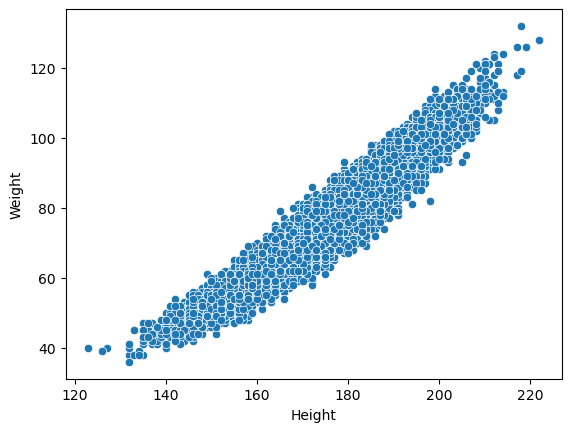

In [84]:
sb.scatterplot(x=df['Height'], y=df['Weight']) 
plt.show()


creating a grid of scatter plots, where each scatter plot represents the relationship between one of the specified features ('Age', 'Height', 'Weight', 'Duration') and the 'Calories' column from the DataFrame df.

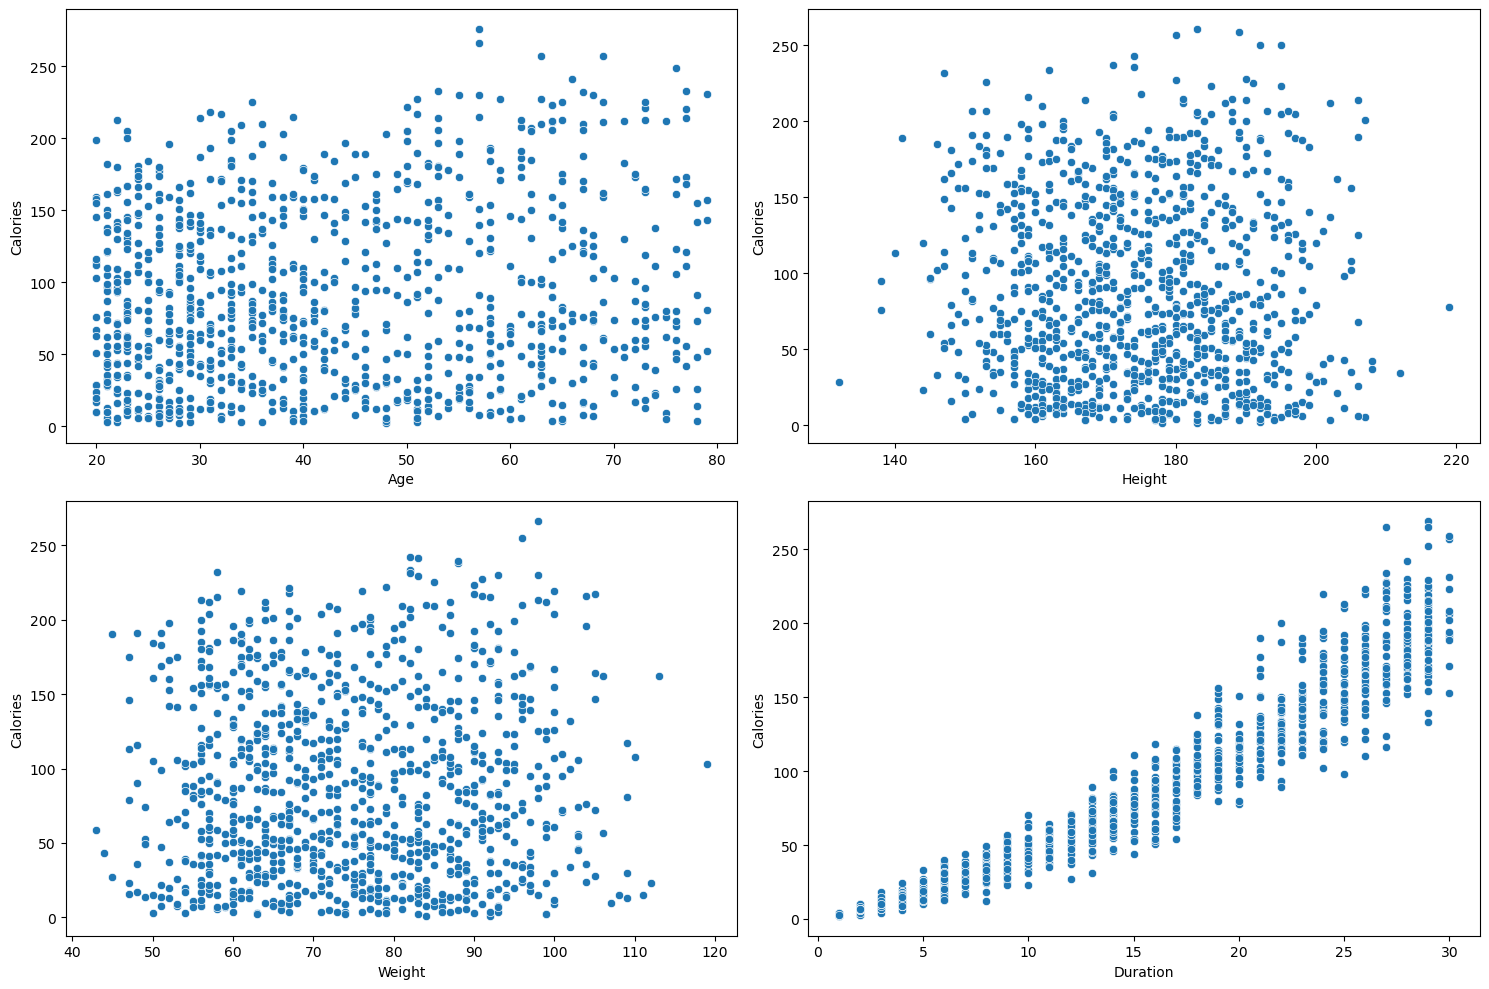

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['Age', 'Height', 'Weight', 'Duration']
num_samples = 1000
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for ax, col in zip(axes.flatten(), features):
    x = df.sample(num_samples)
    sns.scatterplot(x=col, y='Calories', data=x, ax=ax)
    ax.set_xlabel(col)
    ax.set_ylabel('Calories')

plt.tight_layout()
plt.show()


C:\Users\orias\AppData\Local\Temp\ipykernel_35228\2670564132.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(2, 3, i + 1)


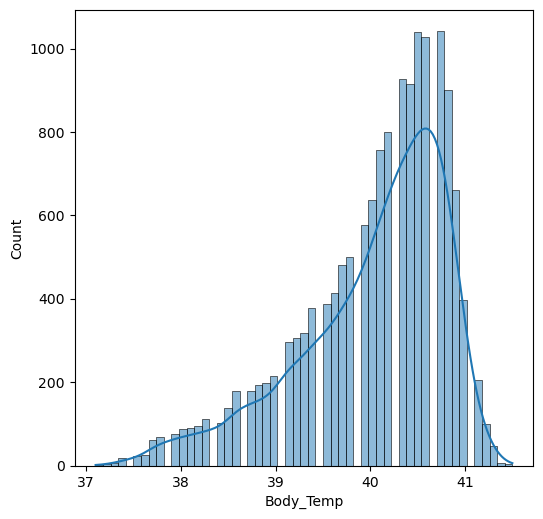

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

features = df.select_dtypes(include='float').columns 

plt.subplots(figsize=(15, 10)) 
for i, col in enumerate(features): 
    ax = plt.subplot(2, 3, i + 1) 
    sns.histplot(df[col], kde=True, ax=ax)  # Using displot with kde=True to include kernel density estimation
plt.tight_layout() 
plt.show() 




We then use the map function to replace the values in the 'Gender' column according to the mapping dictionary.
converting male to 0 and female to 1

In [87]:
# Define a mapping dictionary
gender_mapping = {'male': 0, 'female': 1}

# Use the map function to replace values in the 'Gender' column
df['Gender'] = df['Gender'].map(gender_mapping)

# Display the first few rows of the DataFrame to check for NaN values
df.head()



,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190,94,29,105,40.8,231
1,14861698,1,20,166,60,14,94,40.3,66
2,11179863,0,69,179,79,5,88,38.7,26
3,16180408,1,34,179,71,13,100,40.5,71
4,17771927,1,27,154,58,10,81,39.8,35


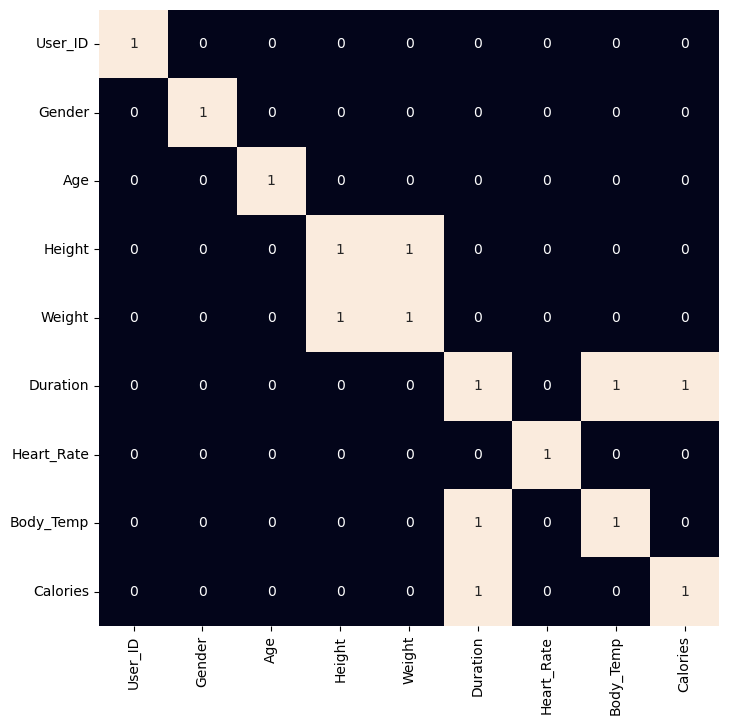

In [88]:
# plt.figure(figsize=(8, 8)) 
# sb.heatmap(df.corr() > 0.9, annot=True, cbar=False) 
# plt.show() 


import matplotlib.pyplot as plt
import seaborn as sns

# Create a correlation matrix
correlation_matrix = df.corr() > 0.9

# Set up the plot
plt.figure(figsize=(8, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cbar=False)

# Show the plot
plt.show()



In [89]:
to_remove = ['Weight', 'Duration'] 
df.drop(to_remove, axis=1, inplace=True) 

In [90]:
#Model Traning

In [91]:
features = df.drop(['User_ID', 'Calories'], axis=1) 
target = df['Calories'].values 

X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=22) 
X_train.shape, X_test.shape 


((12000, 5), (3000, 5))

In [92]:
#Encoding the Categorical Variables

In [93]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Assuming X_train and X_test are your feature matrices

# Define the preprocessing steps for categorical and numerical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Numerical features (assuming all features other than 'gender' are numerical)
numeric_features = [col for col in X_train.columns if col != 'Gender']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Combine transformers for both categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, ['Gender'])
    ])

# Create the preprocessing and scaling pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [94]:
# Normalizing the features for stable and fast training


In [95]:
X_train_scaled = pipeline.fit_transform(X_train)

# Transform the test data
X_test_scaled = pipeline.transform(X_test)

To determine which algorithm is the best among Linear Regression, KNeighborsRegressor, and RandomForestRegressor, we need to consider multiple metrics:

Mean Absolute Error (MAE): Lower values indicate better performance.
Mean Squared Error (MSE): Lower values indicate better performance.
R^2 Score: Closer to 1 indicates better performance (i.e., the model explains more variance in the target variable).

LinearRegression():
Training MAE: 17.94727996837192
Test MAE: 17.737619099572765
Training MSE: 508.65884991326146
Test MSE: 502.7886150581953
Training R^2 Score: 0.8700442731732223
Test R^2 Score: 0.8691920480319301


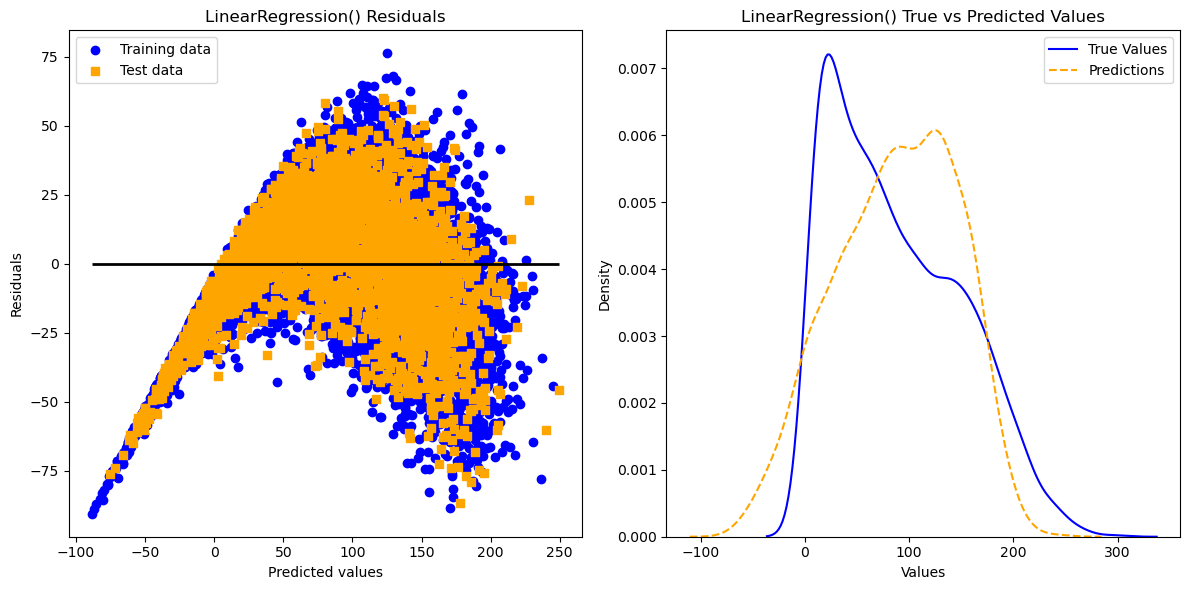


KNeighborsRegressor():
Training MAE: 8.989433333333334
Test MAE: 10.999933333333335
Training MSE: 157.05774000000002
Test MSE: 238.1567066666667
Training R^2 Score: 0.959873788180523
Test R^2 Score: 0.9380399831787734


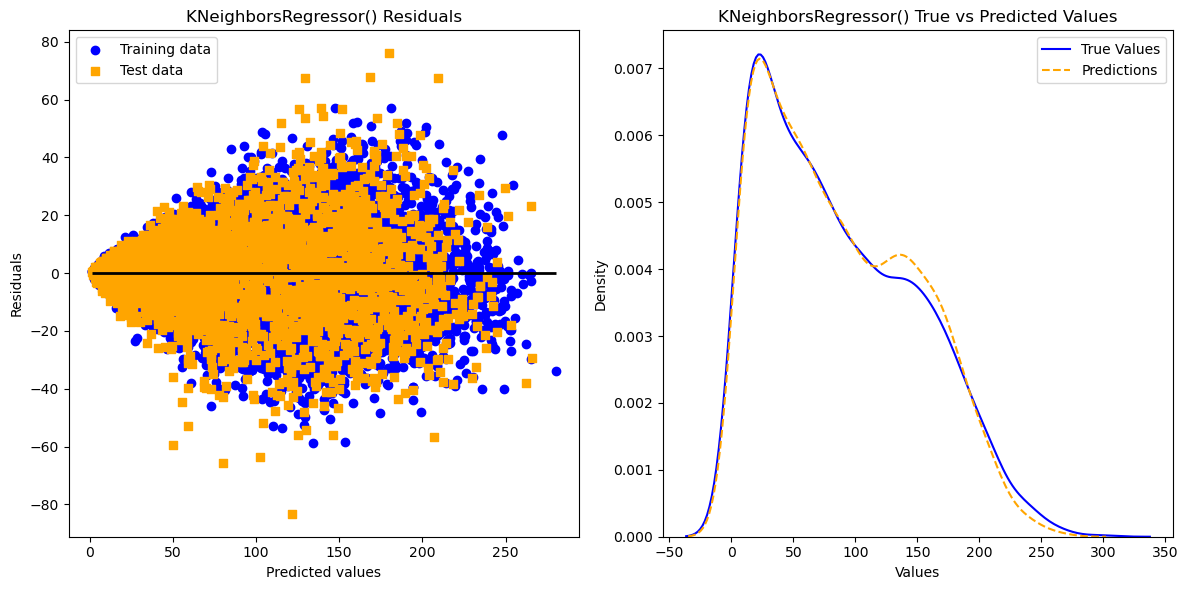


DecisionTreeRegressor():
Training MAE: 0.0615
Test MAE: 14.228666666666667
Training MSE: 0.9633333333333334
Test MSE: 397.59116666666665
Training R^2 Score: 0.9997538808505324
Test R^2 Score: 0.8965607321354272


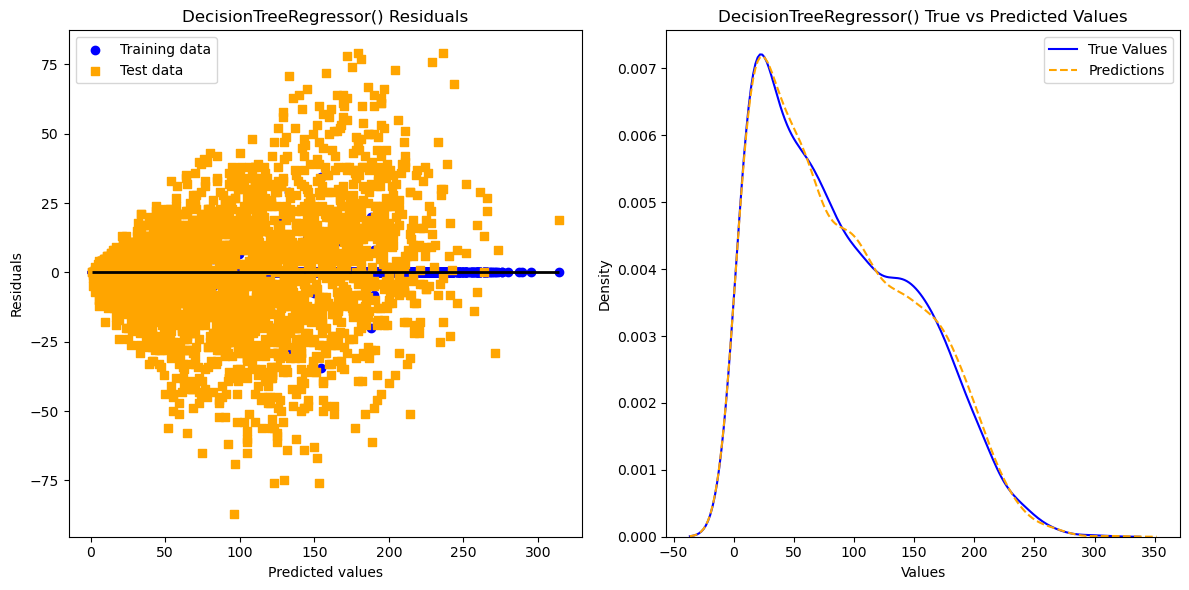


RandomForestRegressor():
Training MAE: 3.9699356964285712
Test MAE: 10.608512007936508
Training MSE: 31.524501918765065
Test MSE: 221.5288616416646
Training R^2 Score: 0.9919458993775419
Test R^2 Score: 0.9423659648900163


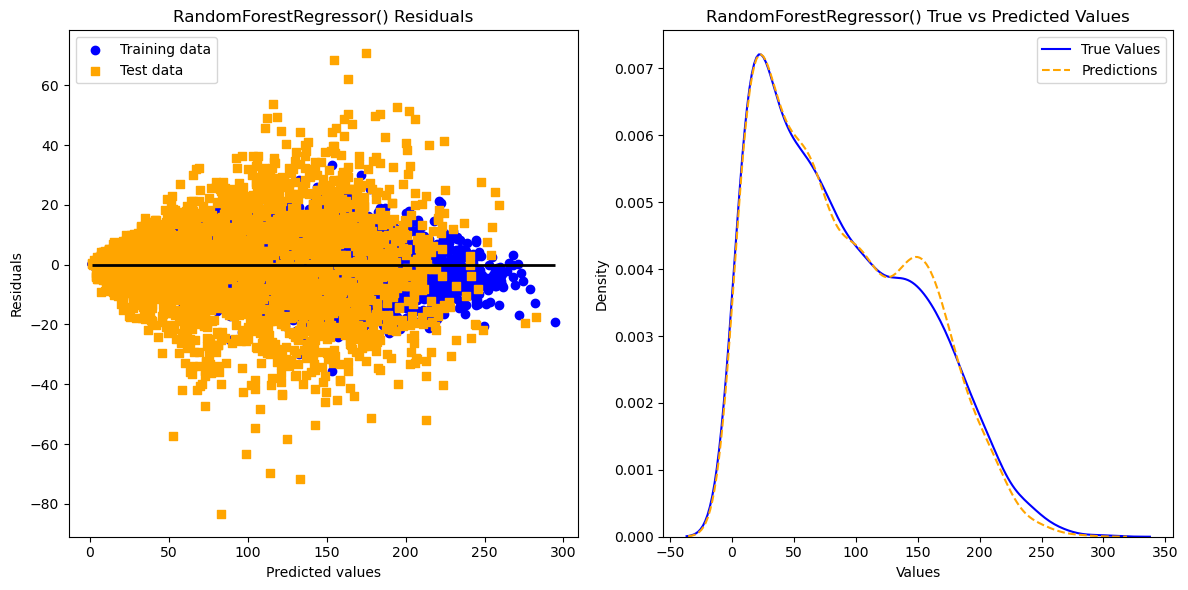

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor




models = [
    LinearRegression(), 
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    RandomForestRegressor(), 
]

for model in models:
    model.fit(X_train_scaled, Y_train)
    print(f'{model}:')
    
    train_preds = model.predict(X_train_scaled)
    test_preds = model.predict(X_test_scaled)
    
    # Regression metrics
    print('Training MAE:', mae(Y_train, train_preds))
    print('Test MAE:', mae(Y_test, test_preds))
    print('Training MSE:', mean_squared_error(Y_train, train_preds))
    print('Test MSE:', mean_squared_error(Y_test, test_preds))
    print('Training R^2 Score:', r2_score(Y_train, train_preds))
    print('Test R^2 Score:', r2_score(Y_test, test_preds))
    
    # Plotting residuals
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(train_preds, train_preds - Y_train, c='blue', marker='o', label='Training data')
    plt.scatter(test_preds, test_preds - Y_test, c='orange', marker='s', label='Test data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=min(train_preds.min(), test_preds.min()), xmax=max(train_preds.max(), test_preds.max()), color='black', lw=2)
    plt.title(f'{model} Residuals')
    
    # Diagnostic plots for regression models
    plt.subplot(1, 2, 2)
    sns.kdeplot(Y_test, label="True Values", color="blue", linestyle="-")
    sns.kdeplot(test_preds, label="Predictions", color="orange", linestyle="--")
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.title(f'{model} True vs Predicted Values')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    print()  # Empty line for clarity
